# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_05_002
## Нелінійна фільтрація. Медіанний фільтр (уніполярна завада)

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from numpy.random import Generator, MT19937
plt.rcParams['font.size'] = 10

In [2]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Lenna.png' 
test_im = io.imread(path+filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
bins_flt = np.float32(bins) ## кількість рівнів яскравості в форматі float
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (512, 512, 3) IMAGE SIZE 786432
ROWS NUMBER 512 CLMS NUMBER 512 PIX NUMBER 262144 Bins 256


####  Однополярна імпульсна завада **"СІЛЬ / ПЕРЕЦЬ"**

In [3]:
rg = Generator(MT19937(12345))
impuls_num = 512  # кількість завад
test_im_noise = test_im.copy()
for i in range(1,impuls_num):
    test_im_noise[np.int32(rg.random()*rows_num),np.int32(rg.random()*clms_num),:] = 0   
    test_im_noise[np.int32(rg.random()*rows_num),np.int32(rg.random()*clms_num),:] = 255   


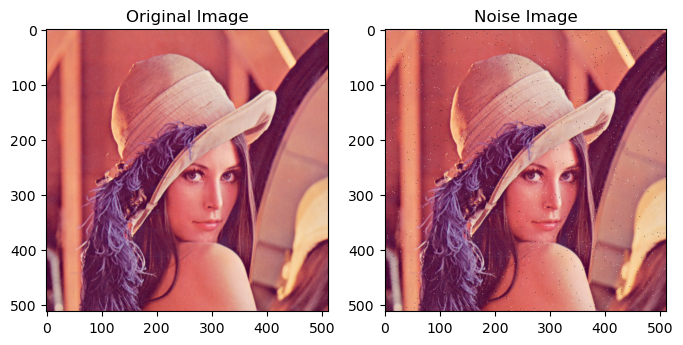

In [4]:
## Вивід орігінального зображення  та зображення із завадами
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(test_im_noise)
ax[1].set_title("Noise Image")
plt.show()

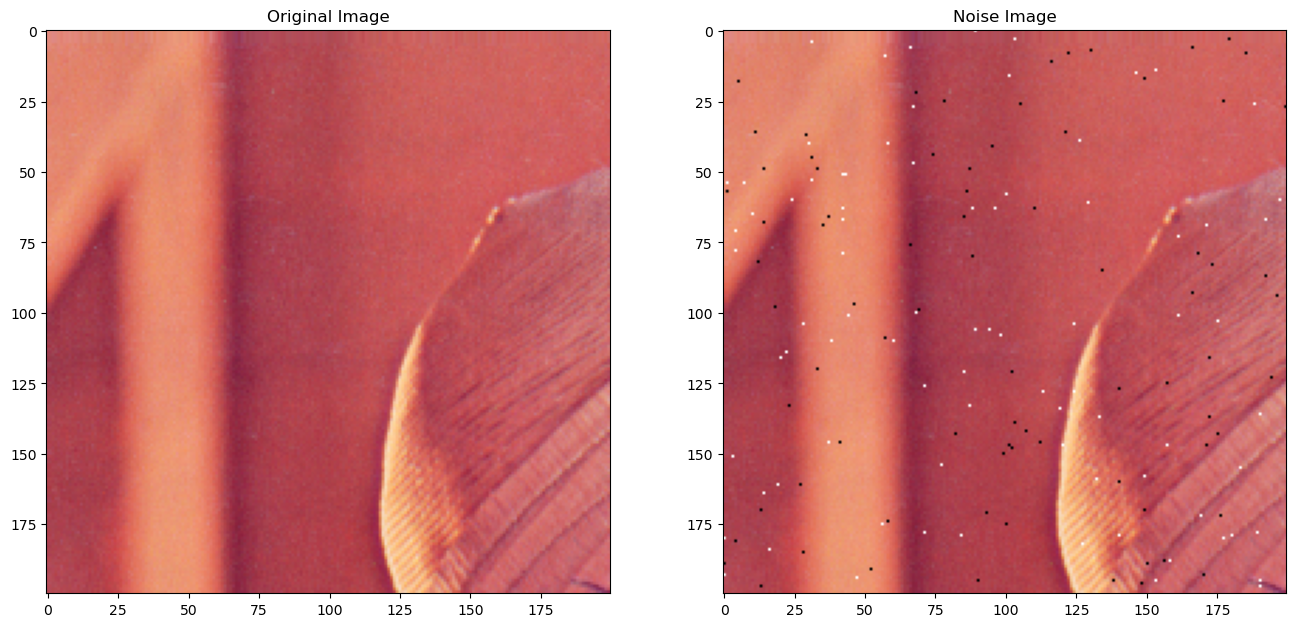

In [5]:
## Вивід ЗБІЛЬШЕНОЇ ЧАСТИНИ орігінального зображення  та зображення із завадами  
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im[0:200,0:200,:])
ax[0].set_title("Original Image")
ax[1].imshow(test_im_noise[0:200,0:200,:])
ax[1].set_title("Noise Image")
plt.show()

####  Лініний усередняючий фільтр розмиття (BOX filter)

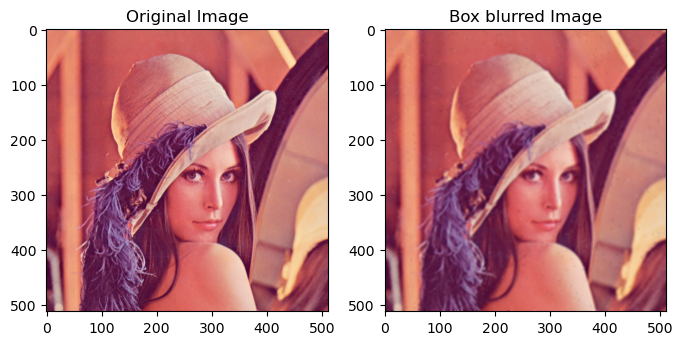

In [6]:
## Визначення файлу перетвореного зображення
L = 5 ; mask_row = L ; mask_clm = L
filtr_im = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)

for i in  range (2, (rows_num-2), 1):
    for j in  range (2, (clms_num-2), 1):
        filtr_im [i, j, :] = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                filtr_im [i, j, :] += test_im_noise [i-(2-k), j-(2-l), :]
        filtr_im [i, j, :] = np.uint8(filtr_im [i, j, :]/25)

        
# Відновлюємо крайні строки та ствпці зображення
for i in  (0,1,rows_num - 2 , rows_num -1):
    for j in  range (0, clms_num, 1):
        #filtr_im [i,j,:]=test_im[i, j,:]
        filtr_im [i,j,:]= test_im_noise[i,j,:]
for j in  (0,1,clms_num - 2 , clms_num -1):
    for i in  range (0, rows_num, 1):
        #filtr_im [i,j,:]=test_im[i, j,:]
        filtr_im [i,j,:]= test_im_noise[i,j,:]        

## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im)
ax[1].set_title("Box blurred Image")
plt.show()

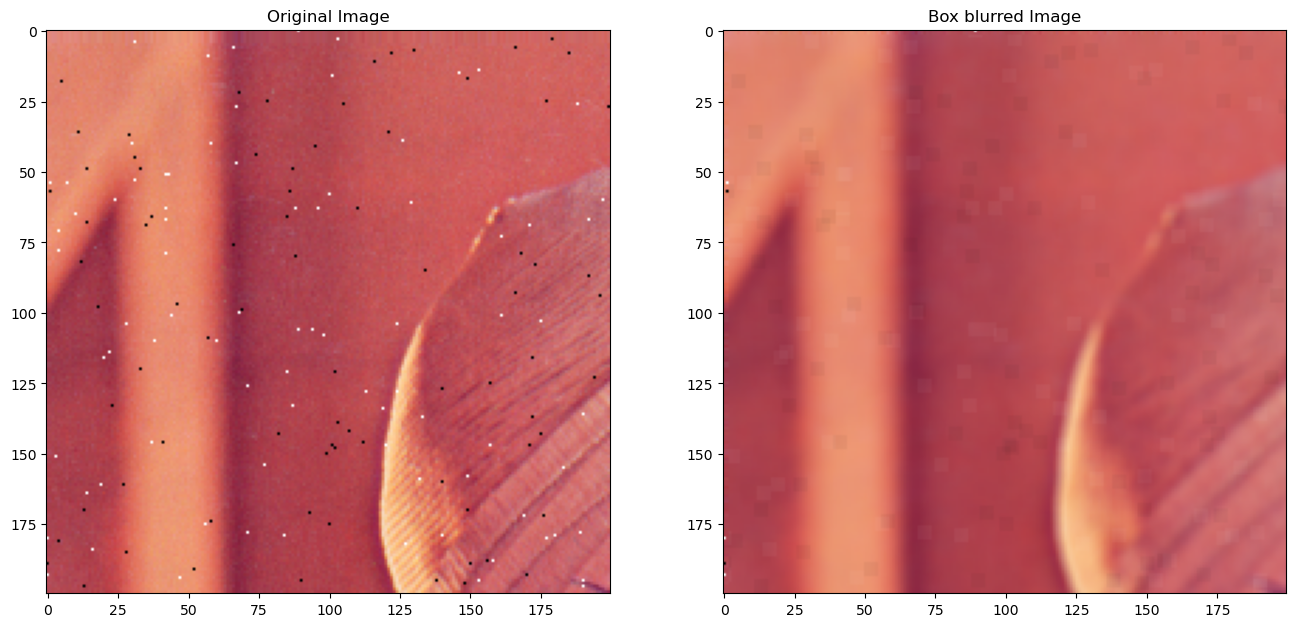

In [7]:
 ## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im_noise[0:200,0:200,:])
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im[0:200,0:200,:])
ax[1].set_title("Box blurred Image")
plt.show()

####  Медіанний фільтр. Вікно "КВАДРАТ"

In [8]:
## МАСКА МЕДІАННОГО ФИЛЬТРУ (КВАДРАТ 3 х 3)
mask_row = 3
mask_clm = 3
mask = np.zeros ( (mask_row, mask_clm, 1), dtype = np.uint8)
print ('MASK SHAPE', mask.shape, 'MASK SIZE', mask_row*mask_clm)


## Визначення файлу перетворенного зображення
filtr_im_noise_ = np.zeros ( (rows_num, clms_num, 3), dtype = np.uint8)

# Масив пікселей для сортування та визначення медіани
pixels = np.zeros((mask_row, mask_clm, 3), dtype=np.uint8) 
# Масив пікселей із значанням медіани (кольори)
pix    = np.zeros(3, dtype=np.uint8) 

for i in  range (1, (rows_num -1), 1):
    for j in  range (1, (clms_num-1), 1):
        for l in range (mask_row):
            for k in range (mask_clm):
                pixels[l,k, :] = test_im_noise [i-(2-k), j-(2-l), :]
        pix[0] = np.median(pixels[:,:,0])
        pix[1] = np.median(pixels[:,:,1])
        pix[2] = np.median(pixels[:,:,2])
        filtr_im_noise_[i,j,:] = pix
        
# Відновлюємо граничні ряки та совбці
for i in  (0,1,rows_num - 2 , rows_num -1):
    for j in  range (0, clms_num, 1):
        #filtr_im [i,j,:]=test_im[i, j,:]
        filtr_im_noise_ [i,j,:]= test_im_noise[i,j,:]
for j in  (0,1,clms_num - 2 , clms_num -1):
    for i in  range (0, rows_num, 1):
        #filtr_im [i,j,:]=test_im[i, j,:]
        filtr_im_noise_ [i,j,:]= test_im_noise[i,j,:]
                      


MASK SHAPE (3, 3, 1) MASK SIZE 9


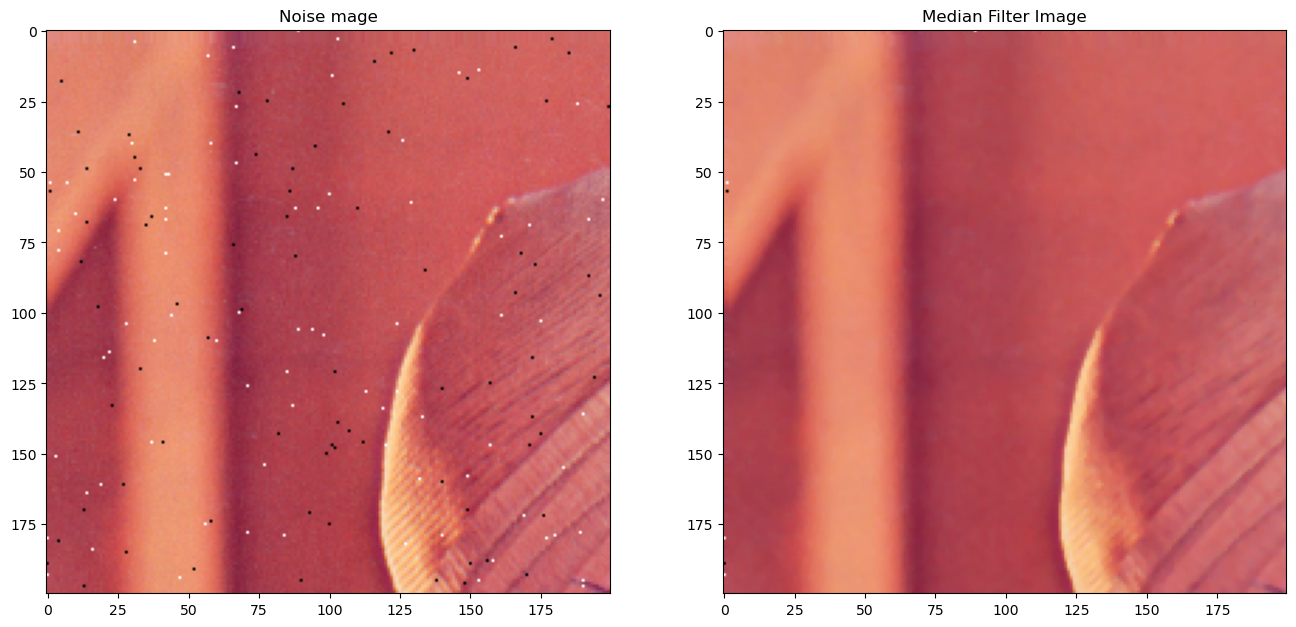

In [9]:
## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО ТА ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im_noise[0:200,0:200,:])
ax[0].set_title("Noise mage")
ax[1].imshow(filtr_im_noise_[0:200,0:200,:])
ax[1].set_title("Median Filter Image")
plt.show()

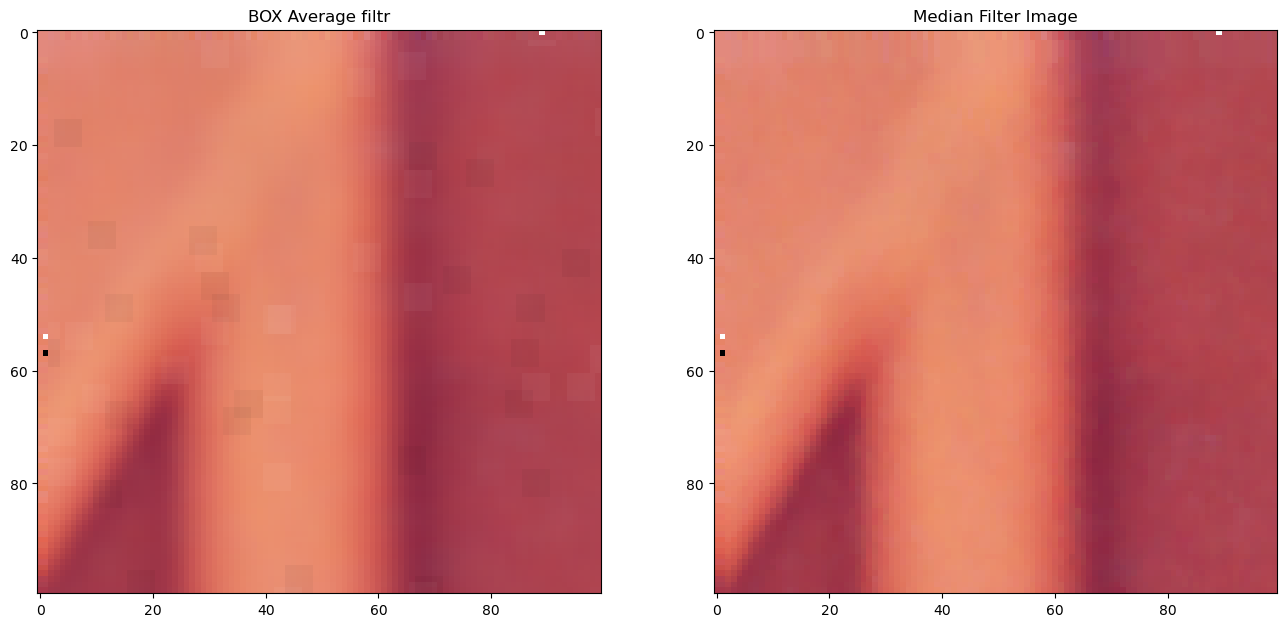

In [10]:

## СУМІСНИЙ ВИВІД BOX Blurred ТА Median Blurred ЗОБРАЖЕННЬ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(filtr_im[0:100,0:100,:])
ax[0].set_title("BOX Average filtr")
ax[1].imshow(filtr_im_noise_[0:100,0:100,:])
ax[1].set_title("Median Filter Image")
plt.show()

#### Побудова гістограм зображень із завадами та фільтрованого

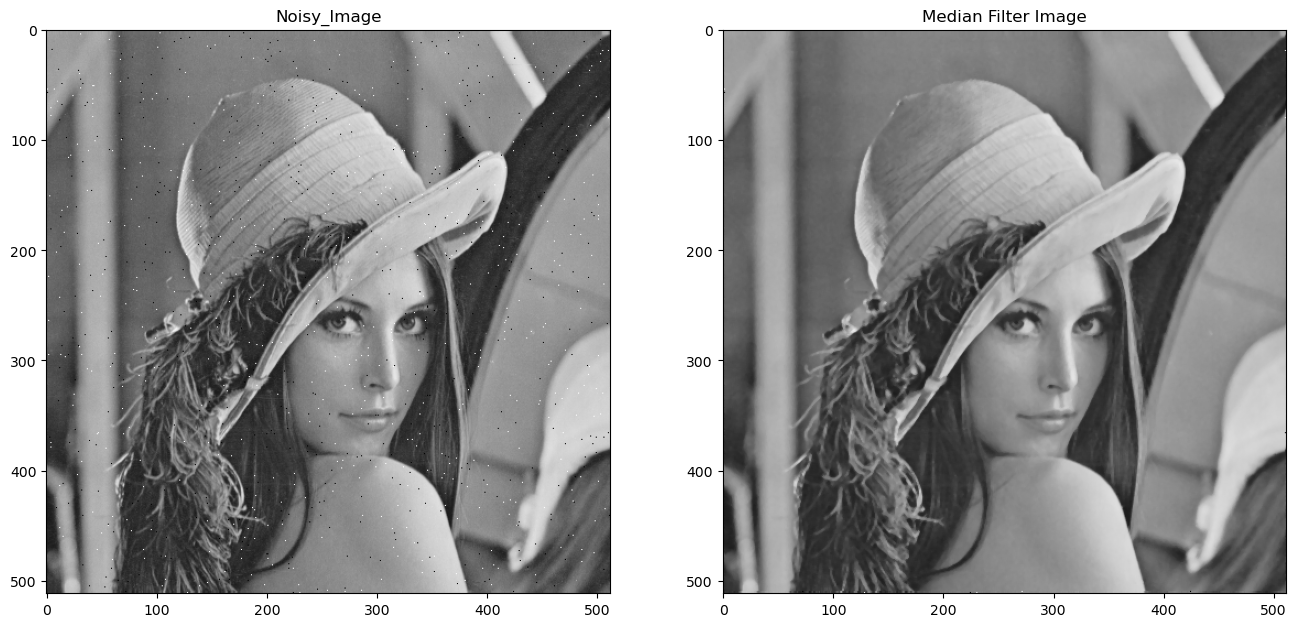

In [11]:
# Масиви для монохромних зображень
test_im_noise_gray = np.zeros ( (rows_num, clms_num, 3), dtype=np.float32) # з завадами
filtr_im_gray      = np.zeros ( (rows_num, clms_num, 3), dtype=np.float32) # після фільтрації

# Формування монохромних зображень
for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        test_im_noise_gray [i, j, :] = (0.299*test_im_noise [i, j, 0]+0.587*test_im_noise [i, j, 1]+0.114*test_im_noise [ i, j, 2])/256.0
        filtr_im_gray      [i, j, :] = (0.299*filtr_im_noise_[i, j, 0]+0.587*filtr_im_noise_[i, j, 1]+0.114*filtr_im_noise_[ i, j, 2])/256.0       

## Відображаємо
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im_noise_gray)
ax[0].set_title("Noisy_Image")
ax[1].imshow(filtr_im_gray)
ax[1].set_title("Median Filter Image")
plt.show()


#### Порівняння гістограм

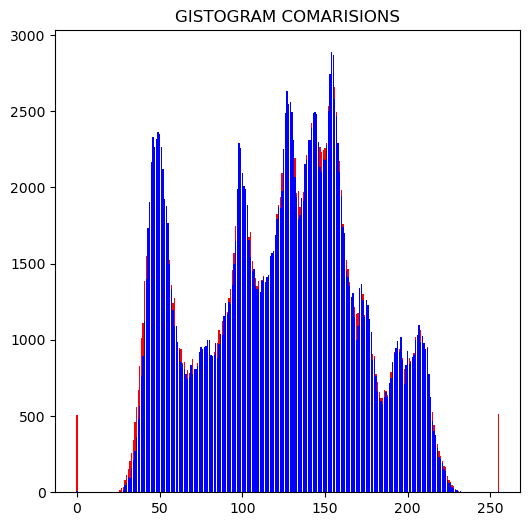

In [12]:
# Масиви для гістограм
L_gisto_noise = np.zeros ( (bins), dtype=np.uint32)
L_gisto_filtr = np.zeros ( (bins), dtype=np.uint32)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        L_gisto_noise [np.uint8(test_im_noise_gray[i, j, 0]*256)] += 1 
        L_gisto_filtr [np.uint8(filtr_im_gray[i, j, 0]*256)] += 1 
        
# Порівняння 
        
pix_index = np.arange(256) 
fig, ax = plt.subplots(figsize=(6,6))
plt.title('GISTOGRAM COMARISIONS')
ax.bar(pix_index, L_gisto_noise, color = 'red')
ax.bar(pix_index, L_gisto_filtr, color =  'blue')
plt.show()